<a href="https://colab.research.google.com/github/oasquared/Phase-3/blob/main/AQI_Capstone_cohort_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real-time Air Quality Forecasting in New Mexico (Using Machine Learning)

## Problem Definition

Air quality is a significant public health concern, particularly in regions like New Mexico, where environmental and industrial factors influence pollutant levels. The system leverages past concentrations of key pollutants (CO, NO₂, SO₂, PM10, O₃) along with meteorological variables such as temperature, wind speed and direction, and barometric pressure to develop a machine learning-based model that can accurately predict air pollutant levels (PM2.5) .The primary goal is to build robust regression models that minimize Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).
By providing timely predictions, the system aims to

*   Mitigate public exposure to harmful air quality conditions.
*   Support public health interventions and policy planning.
*   Empower citizens and local authorities with actionable environmental insights.














This is a supervised learning problem because we are using labeled data

This is a regression problem since target variable (PM2.5) is continuous

## Data Collection/Sources

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit,cross_val_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
import plotly.figure_factory as ff
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!ls -la ./drive/MyDrive/AQI-capstone/

total 287021
-rw------- 1 root root   3240719 Jun 20 02:38 2ZV.csv
-rw------- 1 root root 290664359 May 30 17:23 AQI_completedata.csv
drwx------ 2 root root      4096 Jun 20 02:34 .ipynb_checkpoints


In [ ]:
! cp  ./drive/MyDrive/AQI-capstone/AQI_completedata.csv ./AQI_completedataV2.csv

In [ ]:
df=pd.read_csv("AQI_completedataV2.csv")

In [ ]:
df.head()

,state code,county code,site num,parameter code,poc,latitude,longitude,datum,parameter name,sample duration,...,aqi,method code,method name,local site name,address,state name,county name,city name,cbsa name,date of last change
0,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25
1,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25
2,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25
3,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25
4,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,NaN,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956781 entries, 0 to 956780
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   state code           956781 non-null  int64  
 1   county code          956781 non-null  int64  
 2   site num             956781 non-null  int64  
 3   parameter code       956781 non-null  int64  
 4   poc                  956781 non-null  int64  
 5   latitude             956781 non-null  float64
 6   longitude            956781 non-null  float64
 7   datum                956781 non-null  object 
 8   parameter name       956781 non-null  object 
 9   sample duration      956781 non-null  object 
 10  pollutant standard   542268 non-null  object 
 11  date local           956781 non-null  object 
 12  units of measure     956781 non-null  object 
 13  event type           45733 non-null   object 
 14  observation count    956781 non-null  int64  
 15  observation perce

Let's check if any of the columns are having null values

In [ ]:
df.isnull().sum()

,0
state code,0
county code,0
site num,0
parameter code,0
poc,0
latitude,0
longitude,0
datum,0
parameter name,0
sample duration,0


In [ ]:
df['parameter name'].value_counts()

,count
parameter name,
Outdoor Temperature,180574
Ozone,146174
Acceptable PM2.5 AQI & Speciation Mass,128690
PM10 Total 0-10um STP,109416
PM2.5 - Local Conditions,106499
Carbon monoxide,82285
Nitrogen dioxide (NO2),75522
Sulfur dioxide,66905
PM10-2.5 - Local Conditions,28954


In [ ]:
df.shape

(956781, 29)

## Data Cleaning

Let's filter the data for the parameters which we are focusing for our project.

In [ ]:
filtered_df=df[df['parameter name'].isin(['PM2.5 - Local Conditions', 'Ozone', 'Carbon monoxide', 'Nitrogen dioxide (NO2)', 'Sulfur dioxide','PM10 Total 0-10um STP','Outdoor Temperature','Barometric pressure','Wind Speed - Resultant','Wind Direction - Resultant'])]

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799137 entries, 0 to 954085
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   state code           799137 non-null  int64  
 1   county code          799137 non-null  int64  
 2   site num             799137 non-null  int64  
 3   parameter code       799137 non-null  int64  
 4   poc                  799137 non-null  int64  
 5   latitude             799137 non-null  float64
 6   longitude            799137 non-null  float64
 7   datum                799137 non-null  object 
 8   parameter name       799137 non-null  object 
 9   sample duration      799137 non-null  object 
 10  pollutant standard   542268 non-null  object 
 11  date local           799137 non-null  object 
 12  units of measure     799137 non-null  object 
 13  event type           45279 non-null   object 
 14  observation count    799137 non-null  int64  
 15  observation percent  7

In [ ]:
filtered_df['parameter name'].value_counts()

,count
parameter name,
Outdoor Temperature,180574
Ozone,146174
PM10 Total 0-10um STP,109416
PM2.5 - Local Conditions,106499
Carbon monoxide,82285
Nitrogen dioxide (NO2),75522
Sulfur dioxide,66905
Barometric pressure,12863
Wind Speed - Resultant,9455


Check the null values in AQI for each of the paramaters as per the dataset.

In [ ]:
filtered_df.groupby('parameter name')['aqi'].apply(lambda x: x.isnull().sum())

,aqi
parameter name,
Barometric pressure,12863
Carbon monoxide,41150
Nitrogen dioxide (NO2),0
Outdoor Temperature,180574
Ozone,1
PM10 Total 0-10um STP,0
PM2.5 - Local Conditions,44533
Sulfur dioxide,33391
Wind Direction - Resultant,9444


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799137 entries, 0 to 954085
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   state code           799137 non-null  int64  
 1   county code          799137 non-null  int64  
 2   site num             799137 non-null  int64  
 3   parameter code       799137 non-null  int64  
 4   poc                  799137 non-null  int64  
 5   latitude             799137 non-null  float64
 6   longitude            799137 non-null  float64
 7   datum                799137 non-null  object 
 8   parameter name       799137 non-null  object 
 9   sample duration      799137 non-null  object 
 10  pollutant standard   542268 non-null  object 
 11  date local           799137 non-null  object 
 12  units of measure     799137 non-null  object 
 13  event type           45279 non-null   object 
 14  observation count    799137 non-null  int64  
 15  observation percent  7

In [ ]:
df_cleaned=filtered_df.copy()

Rename the parameters to a short name to keep it simple.

In [ ]:
df_cleaned['parameter name']=df_cleaned['parameter name'].replace({
    'PM2.5 - Local Conditions': 'PM2.5',
    'Ozone': 'O3',
    'Carbon monoxide': 'CO',
    'Nitrogen dioxide (NO2)': 'NO2',
    'Sulfur dioxide': 'SO2',
    'PM10 Total 0-10um STP':'PM10'
})

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799137 entries, 0 to 954085
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   state code           799137 non-null  int64  
 1   county code          799137 non-null  int64  
 2   site num             799137 non-null  int64  
 3   parameter code       799137 non-null  int64  
 4   poc                  799137 non-null  int64  
 5   latitude             799137 non-null  float64
 6   longitude            799137 non-null  float64
 7   datum                799137 non-null  object 
 8   parameter name       799137 non-null  object 
 9   sample duration      799137 non-null  object 
 10  pollutant standard   542268 non-null  object 
 11  date local           799137 non-null  object 
 12  units of measure     799137 non-null  object 
 13  event type           45279 non-null   object 
 14  observation count    799137 non-null  int64  
 15  observation percent  7

Verify the sampling duration used for each pollutant

In [ ]:
df_cleaned['pollutant standard'].unique()

array([nan, 'CO 1-hour 1971', 'CO 8-hour 1971', 'PM25 24-hour 2012',
       'Ozone 8-hour 2015', 'SO2 1-hour 2010', 'SO2 3-hour 1971',
       'PM10 24-hour 2006', 'NO2 1-hour 2010'], dtype=object)

In [ ]:
df_cleaned['sample duration'].unique()

array(['1 HOUR', '8-HR RUN AVG END HOUR', '24-HR BLK AVG', '24 HOUR',
       '8-HR RUN AVG BEGIN HOUR', '3-HR BLK AVG'], dtype=object)

In [ ]:
df_cleaned.shape

(799137, 29)

We are going to consider the samples taken in the below ranges for each of these pollutants.Let's remove the other samples from the dataset.

*   O3 - 8 hour
*   PM2.5 - 24 hour
*   PM10 - 24 hour
*   CO - 8 hour
*   S02 - 1 hour
*   NO2 - 1 hour








In [ ]:
df_new=df_cleaned.copy()

Dropping SO2 3 hour and CO 8 hour samples.

In [ ]:
df_new=df_new[~df_new['pollutant standard'].isin(['SO2 3-hour 1971', 'CO 1-hour 1971'])]

In [ ]:
df_new.shape

(724596, 29)

In [ ]:
df_new['parameter name'].unique()

array(['Wind Speed - Resultant', 'Wind Direction - Resultant', 'CO',
       'PM2.5', 'O3', 'Barometric pressure', 'Outdoor Temperature', 'SO2',
       'PM10', 'NO2'], dtype=object)

In [ ]:
df_new['pollutant standard'].unique()

array([nan, 'CO 8-hour 1971', 'PM25 24-hour 2012', 'Ozone 8-hour 2015',
       'SO2 1-hour 2010', 'PM10 24-hour 2006', 'NO2 1-hour 2010'],
      dtype=object)

Truncate the mean value of each of the pollutants as follows:


*  Ozone (ppm) - truncate to 3 decimal places
*  PM2.5 (μg/m3) - truncate to 1 decimal place
*  PM10 (μg/m3) - truncate to integer
*  CO (ppm) - truncate to 1 decimal place
*  SO2 (ppb) - truncate to integer
*  NO2 (ppb) - truncate to integer





















In [ ]:
# Truncation function
def truncate(value, decimals):
    factor = 10 ** decimals
    return np.floor(value * factor) / factor

# Apply truncation by pollutant
def format_truncate(row):
    p, v = row['parameter name'], row['arithmetic mean']
    if p == 'O3':
        return truncate(v, 3)
    elif p == 'PM2.5' or p == 'CO':
        return truncate(v, 1)
    elif p in ['PM10', 'SO2', 'NO2']:
        return int(v)  # integer truncation
    else:
        return v  # fallback for unknown

df_new['Truncated Mean'] = df_new.apply(format_truncate, axis=1)

In [ ]:
df_new

,state code,county code,site num,parameter code,poc,latitude,longitude,datum,parameter name,sample duration,...,method code,method name,local site name,address,state name,county name,city name,cbsa name,date of last change,Truncated Mean
0,35,1,23,61103,1,35.13430,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,...,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,2.254167
1,35,1,23,61103,1,35.13430,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,...,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,4.083333
2,35,1,23,61103,1,35.13430,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,...,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,3.400000
3,35,1,23,61103,1,35.13430,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,...,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,2.916667
4,35,1,23,61103,1,35.13430,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,...,24.0,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,2.662500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954081,35,1,29,42101,1,35.01708,-106.65739,WGS84,CO,8-HR RUN AVG END HOUR,...,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,SOUTH VALLEY,201 PROSPERITY SE,New Mexico,Bernalillo,South Valley,"Albuquerque, NM",2023-02-05,0.400000
954082,35,1,29,42101,1,35.01708,-106.65739,WGS84,CO,8-HR RUN AVG END HOUR,...,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,SOUTH VALLEY,201 PROSPERITY SE,New Mexico,Bernalillo,South Valley,"Albuquerque, NM",2023-02-05,0.500000
954083,35,1,29,42101,1,35.01708,-106.65739,WGS84,CO,8-HR RUN AVG END HOUR,...,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,SOUTH VALLEY,201 PROSPERITY SE,New Mexico,Bernalillo,South Valley,"Albuquerque, NM",2023-02-05,0.300000
954084,35,1,29,42101,1,35.01708,-106.65739,WGS84,CO,8-HR RUN AVG END HOUR,...,93.0,INSTRUMENTAL - GAS FILTER CORRELATION CO ANALYZER,SOUTH VALLEY,201 PROSPERITY SE,New Mexico,Bernalillo,South Valley,"Albuquerque, NM",2023-02-05,0.400000


Calculate the AQI based on the arithmetic mean using the below formula.

Ip = (IHi-ILo/BPHi-BPLo)(Cp - BPLo) ILo.

Where Ip = the index for pollutant p

Cp = the truncated concentration of pollutant p

BPHi = the concentration breakpoint that is greater than or equal to Cp

BPLo = the concentration breakpoint that is less than or equal to Cp

IHi = the AQI value corresponding to BPHi

ILo = the AQI value corresponding to BPLo

In [ ]:
# Define AQI Breakpoints
breakpoints = {
    'O3': [  # in ppm
        (0.000, 0.054, 0, 50),
        (0.055, 0.070, 51, 100),
        (0.071, 0.085, 101, 150),
        (0.086, 0.105, 151, 200),
        (0.106, 0.200, 201, 300),
        (0.201, 0.404, 301, 400),
        (0.405, 0.504, 401, 500),
    ],
    'PM2.5': [  # in µg/m³
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500),
    ],
    'PM10': [  # in µg/m³
        (0, 54, 0, 50),
        (55, 154, 51, 100),
        (155, 254, 101, 150),
        (255, 354, 151, 200),
        (355, 424, 201, 300),
        (425, 504, 301, 400),
        (505, 604, 401, 500),
    ],
    'CO': [  # in ppm
        (0.0, 4.4, 0, 50),
        (4.5, 9.4, 51, 100),
        (9.5, 12.4, 101, 150),
        (12.5, 15.4, 151, 200),
        (15.5, 30.4, 201, 300),
        (30.5, 40.4, 301, 400),
        (40.5, 50.4, 401, 500),
    ],
    'SO2': [  # in ppb
        (0, 35, 0, 50),
        (36, 75, 51, 100),
        (76, 185, 101, 150),
        (186, 304, 151, 200),
        (305, 604, 201, 300),
        (605, 804, 301, 400),
        (805, 1004, 401, 500),
    ],
    'NO2': [  # in ppb
        (0, 53, 0, 50),
        (54, 100, 51, 100),
        (101, 360, 101, 150),
        (361, 649, 151, 200),
        (650, 1249, 201, 300),
        (1250, 1649, 301, 400),
        (1650, 2049, 401, 500),
    ]
}

# AQI calculation function
def calculate_aqi(cp, pollutant):
    if pollutant not in breakpoints:
        return None
    for bp_lo, bp_hi, i_lo, i_hi in breakpoints[pollutant]:
        if bp_lo <= cp <= bp_hi:
            return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (cp - bp_lo) + i_lo
    return None

# Calculate AQI for each row using the mean and pollutant type
df_new['AQI_derived'] = df_new.apply(lambda row: calculate_aqi(row['Truncated Mean'], row['parameter name']), axis=1)

print(df_new)


        state code  county code  site num  parameter code  poc  latitude  \
0               35            1        23           61103    1  35.13430   
1               35            1        23           61103    1  35.13430   
2               35            1        23           61103    1  35.13430   
3               35            1        23           61103    1  35.13430   
4               35            1        23           61103    1  35.13430   
...            ...          ...       ...             ...  ...       ...   
954081          35            1        29           42101    1  35.01708   
954082          35            1        29           42101    1  35.01708   
954083          35            1        29           42101    1  35.01708   
954084          35            1        29           42101    1  35.01708   
954085          35            1        29           42101    1  35.01708   

        longitude  datum          parameter name        sample duration  ...  \
0      

In [ ]:
df_new.head()

,state code,county code,site num,parameter code,poc,latitude,longitude,datum,parameter name,sample duration,...,method name,local site name,address,state name,county name,city name,cbsa name,date of last change,Truncated Mean,AQI_derived
0,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,2.254167,NaN
1,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,4.083333,NaN
2,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,3.400000,NaN
3,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,2.916667,NaN
4,35,1,23,61103,1,35.1343,-106.5852,WGS84,Wind Speed - Resultant,1 HOUR,...,INSTRUMENTAL - VECTOR SUMMATION LEVEL 4,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,New Mexico,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,2.662500,NaN


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724596 entries, 0 to 954085
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   state code           724596 non-null  int64  
 1   county code          724596 non-null  int64  
 2   site num             724596 non-null  int64  
 3   parameter code       724596 non-null  int64  
 4   poc                  724596 non-null  int64  
 5   latitude             724596 non-null  float64
 6   longitude            724596 non-null  float64
 7   datum                724596 non-null  object 
 8   parameter name       724596 non-null  object 
 9   sample duration      724596 non-null  object 
 10  pollutant standard   467727 non-null  object 
 11  date local           724596 non-null  object 
 12  units of measure     724596 non-null  object 
 13  event type           41498 non-null   object 
 14  observation count    724596 non-null  int64  
 15  observation percent  7

Let's drop the columns which are not relevant for our problem.

In [ ]:
df_final=df_new.drop(['state code','county code','method code','method name','state name','event type','observation count','observation percent'], axis=1)

In [ ]:
df_final.groupby('parameter name')['AQI_derived'].apply(lambda x: x.isnull().sum())

,AQI_derived
parameter name,
Barometric pressure,12863
CO,130
NO2,67
O3,0
Outdoor Temperature,180574
PM10,45
PM2.5,501
SO2,8
Wind Direction - Resultant,9444


Calculate the difference between the derived AQI column and AQI column what was available in the dataset.

In [ ]:
df_final['Difference']=df_final['aqi']-df_final['AQI_derived']

In [ ]:
filter=df_final[df_final['AQI_derived'].isna()]

In [ ]:
filter

,site num,parameter code,poc,latitude,longitude,datum,parameter name,sample duration,pollutant standard,date local,...,aqi,local site name,address,county name,city name,cbsa name,date of last change,Truncated Mean,AQI_derived,Difference
0,23,61103,1,35.1343,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,NaN,2015-01-01,...,NaN,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,2.254167,NaN,NaN
1,23,61103,1,35.1343,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,NaN,2015-01-02,...,NaN,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,4.083333,NaN,NaN
2,23,61103,1,35.1343,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,NaN,2015-01-03,...,NaN,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,3.400000,NaN,NaN
3,23,61103,1,35.1343,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,NaN,2015-01-04,...,NaN,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,2.916667,NaN,NaN
4,23,61103,1,35.1343,-106.58520,WGS84,Wind Speed - Resultant,1 HOUR,NaN,2015-01-05,...,NaN,DEL NORTE HIGH SCHOOL,4700A SAN MATEO NE,Bernalillo,Albuquerque,"Albuquerque, NM",2016-03-25,2.662500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952466,1233,42602,1,36.8071,-108.69523,WGS84,NO2,1 HOUR,NO2 1-hour 2010,2015-06-12,...,0.0,Dine College GIS Lab,"DINE COLLEGE, GIS LAB",San Juan,Shiprock,"Farmington, NM",2024-05-23,-2.000000,NaN,NaN
952485,1233,42602,1,36.8071,-108.69523,WGS84,NO2,1 HOUR,NO2 1-hour 2010,2015-07-01,...,1.0,Dine College GIS Lab,"DINE COLLEGE, GIS LAB",San Juan,Shiprock,"Farmington, NM",2024-05-23,-1.000000,NaN,NaN
952495,1233,42602,1,36.8071,-108.69523,WGS84,NO2,1 HOUR,NO2 1-hour 2010,2015-07-13,...,0.0,Dine College GIS Lab,"DINE COLLEGE, GIS LAB",San Juan,Shiprock,"Farmington, NM",2024-05-23,-2.000000,NaN,NaN
952496,1233,42602,1,36.8071,-108.69523,WGS84,NO2,1 HOUR,NO2 1-hour 2010,2015-07-15,...,0.0,Dine College GIS Lab,"DINE COLLEGE, GIS LAB",San Juan,Shiprock,"Farmington, NM",2024-05-23,-1.000000,NaN,NaN


In [ ]:
df_final[['parameter name','arithmetic mean','Truncated Mean', 'aqi','AQI_derived','Difference']]

,parameter name,arithmetic mean,Truncated Mean,aqi,AQI_derived,Difference
0,Wind Speed - Resultant,2.254167,2.254167,NaN,NaN,NaN
1,Wind Speed - Resultant,4.083333,4.083333,NaN,NaN,NaN
2,Wind Speed - Resultant,3.400000,3.400000,NaN,NaN,NaN
3,Wind Speed - Resultant,2.916667,2.916667,NaN,NaN,NaN
4,Wind Speed - Resultant,2.662500,2.662500,NaN,NaN,NaN
...,...,...,...,...,...,...
954081,CO,0.466667,0.400000,7.0,4.545455,2.454545
954082,CO,0.545833,0.500000,9.0,5.681818,3.318182
954083,CO,0.358333,0.300000,6.0,3.409091,2.590909
954084,CO,0.483333,0.400000,9.0,4.545455,4.454545


Check if the difference between derived AQI and AQI actual is more than 5.

In [ ]:
df_final['Difference']>5

,Difference
0,False
1,False
2,False
3,False
4,False
...,...
954081,False
954082,False
954083,False
954084,False


Since the difference is less than 5,our calculation is correct.Let's check for the further nulls in the AQI derived column.

In [ ]:
filter[['parameter name','arithmetic mean','Truncated Mean', 'aqi','AQI_derived']]

,parameter name,arithmetic mean,Truncated Mean,aqi,AQI_derived
0,Wind Speed - Resultant,2.254167,2.254167,NaN,NaN
1,Wind Speed - Resultant,4.083333,4.083333,NaN,NaN
2,Wind Speed - Resultant,3.400000,3.400000,NaN,NaN
3,Wind Speed - Resultant,2.916667,2.916667,NaN,NaN
4,Wind Speed - Resultant,2.662500,2.662500,NaN,NaN
...,...,...,...,...,...
952466,NO2,-2.350000,-2.000000,0.0,NaN
952485,NO2,-1.033333,-1.000000,1.0,NaN
952495,NO2,-2.700000,-2.000000,0.0,NaN
952496,NO2,-1.000000,-1.000000,0.0,NaN


The columns still having NaN is the AQI derived column is very small for the pollutants and it is because of the negative values in the arithmetic mean.Let's drop those having null values.

In [ ]:
# List of parameters where nulls should be removed
filter_params = ['CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']

# Remove rows where AQI_derived is null for the selected parameters
df_load = df_final[~((df_final['parameter name'].isin(filter_params)) & (df_final['AQI_derived'].isnull()))]


In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723845 entries, 0 to 954085
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   site num             723845 non-null  int64  
 1   parameter code       723845 non-null  int64  
 2   poc                  723845 non-null  int64  
 3   latitude             723845 non-null  float64
 4   longitude            723845 non-null  float64
 5   datum                723845 non-null  object 
 6   parameter name       723845 non-null  object 
 7   sample duration      723845 non-null  object 
 8   pollutant standard   467243 non-null  object 
 9   date local           723845 non-null  object 
 10  units of measure     723845 non-null  object 
 11  arithmetic mean      723845 non-null  float64
 12  1st max value        723845 non-null  float64
 13  1st max hour         723845 non-null  int64  
 14  aqi                  467242 non-null  float64
 15  local site name      6

In [ ]:
df_load.groupby('parameter name')['AQI_derived'].apply(lambda x: x.isnull().sum())

,AQI_derived
parameter name,
Barometric pressure,12863
CO,0
NO2,0
O3,0
Outdoor Temperature,180574
PM10,0
PM2.5,0
SO2,0
Wind Direction - Resultant,9444


Now we don't have any nulls in AQI for all the pollutants.Let's copy all the gases to a new dataframe and unstack it for each of the parameters based on the AQI column.

In [ ]:
df_gases=df_load.copy()

In [ ]:
df_gases=df_gases[df_gases['parameter name'].isin(['PM2.5', 'O3', 'CO', 'NO2', 'SO2','PM10'])]

In [ ]:
df_gases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 511509 entries, 1096 to 954085
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   site num             511509 non-null  int64  
 1   parameter code       511509 non-null  int64  
 2   poc                  511509 non-null  int64  
 3   latitude             511509 non-null  float64
 4   longitude            511509 non-null  float64
 5   datum                511509 non-null  object 
 6   parameter name       511509 non-null  object 
 7   sample duration      511509 non-null  object 
 8   pollutant standard   467243 non-null  object 
 9   date local           511509 non-null  object 
 10  units of measure     511509 non-null  object 
 11  arithmetic mean      511509 non-null  float64
 12  1st max value        511509 non-null  float64
 13  1st max hour         511509 non-null  int64  
 14  aqi                  467242 non-null  float64
 15  local site name    

It looks like the columns having nulls are not relevant.Let's unstack these gases.

In [ ]:
df_gases['parameter name'].value_counts()

,count
parameter name,
O3,146174
PM10,109371
PM2.5,105998
NO2,75455
CO,41005
SO2,33506


In [ ]:
# Convert date column
df_gases['date local'] = pd.to_datetime(df_gases['date local'])

In [ ]:
# Pivot (unstack) on parameter name
df_unstacked_gases = df_gases.pivot_table(
    index=['date local','county name', 'city name','latitude','longitude'],
    columns='parameter name',
    values='AQI_derived',
    aggfunc='mean'  # handle duplicates
).reset_index()

In [ ]:
df_unstacked_gases.head()

parameter name,date local,county name,city name,latitude,longitude,CO,NO2,O3,PM10,PM2.5,SO2
0,2000-01-01,Bernalillo,Albuquerque,35.063100,-106.578785,NaN,NaN,NaN,1.851852,NaN,NaN
1,2000-01-01,Bernalillo,Albuquerque,35.107280,-106.563590,11.363636,NaN,NaN,9.259259,NaN,NaN
2,2000-01-01,Bernalillo,Albuquerque,35.134300,-106.585200,20.454545,NaN,NaN,NaN,NaN,NaN
3,2000-01-01,Bernalillo,Albuquerque,35.202200,-106.649270,5.681818,NaN,NaN,NaN,NaN,NaN
4,2000-01-01,Chaves,Roswell,33.397043,-104.524135,NaN,NaN,NaN,25.000000,NaN,NaN


In [ ]:
df_unstacked_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242528 entries, 0 to 242527
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date local   242528 non-null  datetime64[ns]
 1   county name  242528 non-null  object        
 2   city name    242528 non-null  object        
 3   latitude     242528 non-null  float64       
 4   longitude    242528 non-null  float64       
 5   CO           41005 non-null   float64       
 6   NO2          75455 non-null   float64       
 7   O3           146119 non-null  float64       
 8   PM10         99432 non-null   float64       
 9   PM2.5        44978 non-null   float64       
 10  SO2          33506 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 20.4+ MB


Let's copy meteorological data to a new dataframe and unstack them based on arithmetic mean.

In [ ]:
df_other=df_load.copy()

In [ ]:
df_other=df_other[df_other['parameter name'].isin(['Outdoor Temperature','Barometric pressure','Wind Speed - Resultant','Wind Direction - Resultant'])]

In [ ]:
df_other.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212336 entries, 0 to 936663
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   site num             212336 non-null  int64  
 1   parameter code       212336 non-null  int64  
 2   poc                  212336 non-null  int64  
 3   latitude             212336 non-null  float64
 4   longitude            212336 non-null  float64
 5   datum                212336 non-null  object 
 6   parameter name       212336 non-null  object 
 7   sample duration      212336 non-null  object 
 8   pollutant standard   0 non-null       object 
 9   date local           212336 non-null  object 
 10  units of measure     212336 non-null  object 
 11  arithmetic mean      212336 non-null  float64
 12  1st max value        212336 non-null  float64
 13  1st max hour         212336 non-null  int64  
 14  aqi                  0 non-null       float64
 15  local site name      1

In [ ]:
# Convert date column
df_other['date local'] = pd.to_datetime(df_other['date local'])

In [ ]:
# Pivot (unstack) on parameter name
df_unstacked_other = df_other.pivot_table(
    index=['date local','county name', 'city name','latitude','longitude'],
    columns='parameter name',
    values='arithmetic mean',
    aggfunc='mean'  # handle duplicates
).reset_index()

In [ ]:
df_unstacked_other.head()

parameter name,date local,county name,city name,latitude,longitude,Barometric pressure,Outdoor Temperature,Wind Direction - Resultant,Wind Speed - Resultant
0,2000-01-01,Dona Ana,Las Cruces,32.281483,-106.767781,NaN,50.000000,NaN,NaN
1,2000-01-01,Dona Ana,Not in a city,31.787885,-106.683324,NaN,52.083333,NaN,NaN
2,2000-01-01,Dona Ana,Not in a city,31.795940,-106.558044,NaN,54.187500,NaN,NaN
3,2000-01-01,Dona Ana,Not in a city,31.796218,-106.584434,NaN,54.583333,NaN,NaN
4,2000-01-01,Dona Ana,Not in a city,31.930659,-106.631103,NaN,52.437500,NaN,NaN


In [ ]:
df_unstacked_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107203 entries, 0 to 107202
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   date local                  107203 non-null  datetime64[ns]
 1   county name                 107203 non-null  object        
 2   city name                   107203 non-null  object        
 3   latitude                    107203 non-null  float64       
 4   longitude                   107203 non-null  float64       
 5   Barometric pressure         12863 non-null   float64       
 6   Outdoor Temperature         106849 non-null  float64       
 7   Wind Direction - Resultant  9444 non-null    float64       
 8   Wind Speed - Resultant      9455 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 7.4+ MB


Let's join both gases dataframe and other variables dataframe to a new dataframe.

In [ ]:
merged_df = pd.merge(df_unstacked_gases, df_unstacked_other, on=['date local','county name','city name','latitude','longitude'])

In [ ]:
merged_df.head()

parameter name,date local,county name,city name,latitude,longitude,CO,NO2,O3,PM10,PM2.5,SO2,Barometric pressure,Outdoor Temperature,Wind Direction - Resultant,Wind Speed - Resultant
0,2000-01-01,Dona Ana,Las Cruces,32.281483,-106.767781,11.363636,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
1,2000-01-01,Dona Ana,Not in a city,31.787885,-106.683324,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,52.083333,NaN,NaN
2,2000-01-01,Dona Ana,Not in a city,31.795940,-106.558044,NaN,NaN,NaN,22.222222,NaN,0.0,NaN,54.187500,NaN,NaN
3,2000-01-01,Dona Ana,Not in a city,31.796218,-106.584434,NaN,2.830189,NaN,NaN,NaN,NaN,NaN,54.583333,NaN,NaN
4,2000-01-01,Dona Ana,Not in a city,31.930659,-106.631103,NaN,NaN,NaN,NaN,NaN,0.0,NaN,52.437500,NaN,NaN


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98592 entries, 0 to 98591
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date local                  98592 non-null  datetime64[ns]
 1   county name                 98592 non-null  object        
 2   city name                   98592 non-null  object        
 3   latitude                    98592 non-null  float64       
 4   longitude                   98592 non-null  float64       
 5   CO                          16301 non-null  float64       
 6   NO2                         45217 non-null  float64       
 7   O3                          68537 non-null  float64       
 8   PM10                        49683 non-null  float64       
 9   PM2.5                       20131 non-null  float64       
 10  SO2                         19020 non-null  float64       
 11  Barometric pressure         10945 non-null  float64   

Since our target is PM2.5,let's check for the rows having non-nulls in our target

In [ ]:
filter=merged_df['PM2.5'].notnull()

In [ ]:
merged_df[filter].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20131 entries, 18318 to 98591
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date local                  20131 non-null  datetime64[ns]
 1   county name                 20131 non-null  object        
 2   city name                   20131 non-null  object        
 3   latitude                    20131 non-null  float64       
 4   longitude                   20131 non-null  float64       
 5   CO                          7920 non-null   float64       
 6   NO2                         11481 non-null  float64       
 7   O3                          15164 non-null  float64       
 8   PM10                        17343 non-null  float64       
 9   PM2.5                       20131 non-null  float64       
 10  SO2                         5112 non-null   float64       
 11  Barometric pressure         4876 non-null   float64    

In [ ]:
df_aqi=merged_df[merged_df['PM2.5'].notnull() & merged_df['Barometric pressure'].notnull()]

In [ ]:
df_aqi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4876 entries, 33846 to 98071
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date local                  4876 non-null   datetime64[ns]
 1   county name                 4876 non-null   object        
 2   city name                   4876 non-null   object        
 3   latitude                    4876 non-null   float64       
 4   longitude                   4876 non-null   float64       
 5   CO                          4737 non-null   float64       
 6   NO2                         4829 non-null   float64       
 7   O3                          4763 non-null   float64       
 8   PM10                        4673 non-null   float64       
 9   PM2.5                       4876 non-null   float64       
 10  SO2                         4841 non-null   float64       
 11  Barometric pressure         4876 non-null   float64     

In [ ]:
df_aqi.head()

parameter name,date local,county name,city name,latitude,longitude,CO,NO2,O3,PM10,PM2.5,SO2,Barometric pressure,Outdoor Temperature,Wind Direction - Resultant,Wind Speed - Resultant
33846,2011-01-01,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,8.490566,29.629630,8.333333,11.250000,0.0,853.000000,19.291667,261.212500,4.845833
33856,2011-01-02,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,10.377358,16.666667,13.888889,30.000000,0.0,855.250000,21.416666,224.370833,3.054167
33866,2011-01-03,Bernalillo,Albuquerque,35.1343,-106.5852,4.545455,21.698113,7.407407,25.000000,51.841202,0.0,850.625000,28.979166,225.870833,2.450000
33876,2011-01-04,Bernalillo,Albuquerque,35.1343,-106.5852,6.818182,21.698113,25.000000,26.851852,37.500000,0.0,852.125000,29.687500,206.345833,3.762500
33886,2011-01-05,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,11.320755,30.555556,12.037037,15.416667,0.0,855.833333,33.187500,175.625000,5.937500


In [ ]:
df_aqi['date local'].unique()

<DatetimeArray>
['2011-01-01 00:00:00', '2011-01-02 00:00:00', '2011-01-03 00:00:00',
 '2011-01-04 00:00:00', '2011-01-05 00:00:00', '2011-01-06 00:00:00',
 '2011-01-07 00:00:00', '2011-01-08 00:00:00', '2011-01-09 00:00:00',
 '2011-01-10 00:00:00',
 ...
 '2024-06-20 00:00:00', '2024-06-21 00:00:00', '2024-06-22 00:00:00',
 '2024-06-23 00:00:00', '2024-06-24 00:00:00', '2024-06-25 00:00:00',
 '2024-06-26 00:00:00', '2024-06-27 00:00:00', '2024-06-28 00:00:00',
 '2024-06-29 00:00:00']
Length: 4876, dtype: datetime64[ns]

In [ ]:
df_aqi.isnull().sum()

,0
parameter name,
date local,0
county name,0
city name,0
latitude,0
longitude,0
CO,139
NO2,47
O3,113
PM10,203


In [ ]:
df_aqicleaned=df_aqi.copy()

In [ ]:
# Convert to datetime and set as index
df_aqicleaned['date local'] = pd.to_datetime(df_aqicleaned['date local'])
df_aqicleaned.sort_values('date local', inplace=True)
df_aqicleaned.set_index('date local', inplace=True)

# Columns to interpolate
cols_to_interp = ['CO', 'NO2', 'O3', 'PM10', 'SO2',
                  'Wind Direction - Resultant', 'Wind Speed - Resultant']

# Apply time-based interpolation
df_aqicleaned[cols_to_interp] = df_aqicleaned[cols_to_interp].interpolate(method='time')

# Optional fallback for remaining nulls
#df_aqicleaned[cols_to_interp] =df_aqicleaned[cols_to_interp].fillna(method='bfill').fillna(method='ffill')

 #(Optional) Reset index if you want date local back as a column
df_aqicleaned.reset_index(inplace=True)


In [ ]:
df_aqicleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4876 entries, 0 to 4875
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date local                  4876 non-null   datetime64[ns]
 1   county name                 4876 non-null   object        
 2   city name                   4876 non-null   object        
 3   latitude                    4876 non-null   float64       
 4   longitude                   4876 non-null   float64       
 5   CO                          4876 non-null   float64       
 6   NO2                         4876 non-null   float64       
 7   O3                          4876 non-null   float64       
 8   PM10                        4876 non-null   float64       
 9   PM2.5                       4876 non-null   float64       
 10  SO2                         4876 non-null   float64       
 11  Barometric pressure         4876 non-null   float64     

In [ ]:
df_aqicleaned

parameter name,date local,county name,city name,latitude,longitude,CO,NO2,O3,PM10,PM2.5,SO2,Barometric pressure,Outdoor Temperature,Wind Direction - Resultant,Wind Speed - Resultant
0,2011-01-01,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,8.490566,29.629630,8.333333,11.250000,0.0,853.000000,19.291667,261.212500,4.845833
1,2011-01-02,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,10.377358,16.666667,13.888889,30.000000,0.0,855.250000,21.416666,224.370833,3.054167
2,2011-01-03,Bernalillo,Albuquerque,35.1343,-106.5852,4.545455,21.698113,7.407407,25.000000,51.841202,0.0,850.625000,28.979166,225.870833,2.450000
3,2011-01-04,Bernalillo,Albuquerque,35.1343,-106.5852,6.818182,21.698113,25.000000,26.851852,37.500000,0.0,852.125000,29.687500,206.345833,3.762500
4,2011-01-05,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,11.320755,30.555556,12.037037,15.416667,0.0,855.833333,33.187500,175.625000,5.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,2024-06-25,Bernalillo,Albuquerque,35.1343,-106.5852,1.136364,5.660377,37.962963,13.888889,15.416667,0.0,839.375000,83.750000,171.461538,1.130769
4872,2024-06-26,Bernalillo,Albuquerque,35.1343,-106.5852,1.136364,3.773585,46.296296,16.666667,16.388889,0.0,839.791667,84.125000,171.461538,1.130769
4873,2024-06-27,Bernalillo,Albuquerque,35.1343,-106.5852,1.136364,2.830189,41.666667,12.962963,13.472222,0.0,839.083333,75.791667,171.461538,1.130769
4874,2024-06-28,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,3.773585,40.740741,11.111111,14.166667,0.0,837.666667,78.875000,171.461538,1.130769


Extract some date features from the date column.

In [ ]:
# Extract date features
df_aqicleaned['year'] = df_aqicleaned['date local'].dt.year
df_aqicleaned['month'] = df_aqicleaned['date local'].dt.month
df_aqicleaned['dayofweek'] = df_aqicleaned['date local'].dt.dayofweek
df_aqicleaned['is_weekend'] = df_aqicleaned['dayofweek'].isin([5, 6]).astype(int)

# Define season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_aqicleaned['season'] = df_aqicleaned['month'].apply(get_season)
df_aqicleaned = pd.get_dummies(df_aqicleaned, columns=['season'], drop_first=True)

In [ ]:
df_aqicleaned.head()

,date local,county name,city name,latitude,longitude,CO,NO2,O3,PM10,PM2.5,...,Outdoor Temperature,Wind Direction - Resultant,Wind Speed - Resultant,year,month,dayofweek,is_weekend,season_Spring,season_Summer,season_Winter
0,2011-01-01,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,8.490566,29.629630,8.333333,11.250000,...,19.291667,261.212500,4.845833,2011,1,5,1,False,False,True
1,2011-01-02,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,10.377358,16.666667,13.888889,30.000000,...,21.416666,224.370833,3.054167,2011,1,6,1,False,False,True
2,2011-01-03,Bernalillo,Albuquerque,35.1343,-106.5852,4.545455,21.698113,7.407407,25.000000,51.841202,...,28.979166,225.870833,2.450000,2011,1,0,0,False,False,True
3,2011-01-04,Bernalillo,Albuquerque,35.1343,-106.5852,6.818182,21.698113,25.000000,26.851852,37.500000,...,29.687500,206.345833,3.762500,2011,1,1,0,False,False,True
4,2011-01-05,Bernalillo,Albuquerque,35.1343,-106.5852,2.272727,11.320755,30.555556,12.037037,15.416667,...,33.187500,175.625000,5.937500,2011,1,2,0,False,False,True


In [ ]:
df_aqicleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4876 entries, 0 to 4875
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date local                  4876 non-null   datetime64[ns]
 1   county name                 4876 non-null   object        
 2   city name                   4876 non-null   object        
 3   latitude                    4876 non-null   float64       
 4   longitude                   4876 non-null   float64       
 5   CO                          4876 non-null   float64       
 6   NO2                         4876 non-null   float64       
 7   O3                          4876 non-null   float64       
 8   PM10                        4876 non-null   float64       
 9   PM2.5                       4876 non-null   float64       
 10  SO2                         4876 non-null   float64       
 11  Barometric pressure         4876 non-null   float64     

In [ ]:
df_aqicleaned.to_excel('output.xlsx', index=False)

##Exploratory Data Analysis

In [ ]:
import plotly.express as px

fig = px.line(df_aqicleaned, x='date local', y='PM2.5', title='PM2.5 Levels Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='PM2.5 (μg/m³)')
fig.show()


In [ ]:
pollutants = ['CO', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']
df_melted = df_aqicleaned.melt(value_vars=pollutants, var_name='Pollutant', value_name='Concentration')

fig = px.box(df_melted, x='Pollutant', y='Concentration', title='Pollutant Concentration Distribution')
fig.show()


In [ ]:
df_aqicleaned2=df_aqicleaned.copy()
df_aqicleaned2=df_aqicleaned2.drop(columns=['latitude','longitude'])

In [ ]:
corr_matrix = df_aqicleaned2.corr(numeric_only=True)
z = np.round(corr_matrix.values, 2)

fig = ff.create_annotated_heatmap(
    z=z,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale='Viridis',
    showscale=True
)
fig.update_layout(title_text='Correlation Heatmap')
fig.show()


In [ ]:
fig = px.scatter(df_aqicleaned, x='Outdoor Temperature', y='PM2.5',
                 title='PM2.5 vs Outdoor Temperature',
                 labels={'Outdoor Temperature': 'Temperature (°F)', 'PM2.5': 'PM2.5 - AQI'})
fig.show()


###Feature Selection

In [ ]:
# Define feature and target columns
feature_cols = [
    'CO', 'NO2', 'O3', 'PM10', 'SO2',
    'Barometric pressure', 'Outdoor Temperature',
    'Wind Direction - Resultant', 'Wind Speed - Resultant',
    'month', 'dayofweek', 'is_weekend',
    'season_Spring', 'season_Summer', 'season_Winter'
]
target = 'PM2.5'

In [ ]:
# Chronological split
train_df = df_aqicleaned[df_aqicleaned['year'] <= 2022]
test_df = df_aqicleaned[df_aqicleaned['year'] >= 2023]

X_train = train_df[feature_cols]
y_train = train_df[target]
X_test = test_df[feature_cols]
y_test = test_df[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(f"Training size: {len(train_df)} rows ({len(train_df)/len(df_aqicleaned)*100:.2f}%)")
print(f"Testing size: {len(test_df)} rows ({len(test_df)/len(df_aqicleaned)*100:.2f}%)")

Training size: 4332 rows (88.84%)
Testing size: 544 rows (11.16%)


##Processing

###Linear Regression Model

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"🔹 Linear Regression - RMSE: {rmse_lr:.2f},MAE:{mae_lr:.2f}, R²: {r2_lr:.2f}")


🔹 Linear Regression - RMSE: 6.86,MAE:5.59, R²: 0.26


Text(0, 0.5, 'Predicted PM2.5')

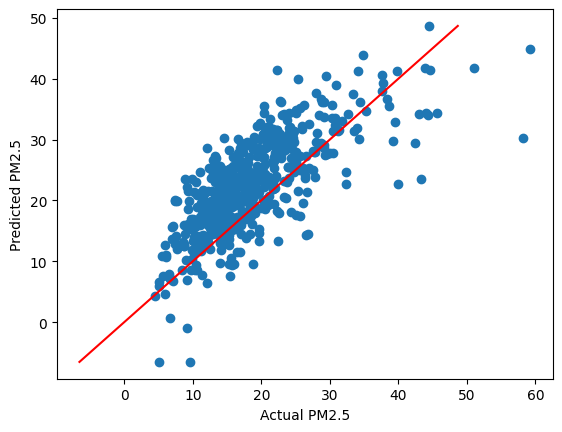

In [ ]:
# See how well our model performs on our test data
y_pred = lr_model.predict(X_test_scaled)
plt.scatter(y_test, y_pred_lr)
plt.plot([min(y_pred_lr), max(y_pred_lr)],[min(y_pred_lr), max(y_pred_lr)], c='red')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')

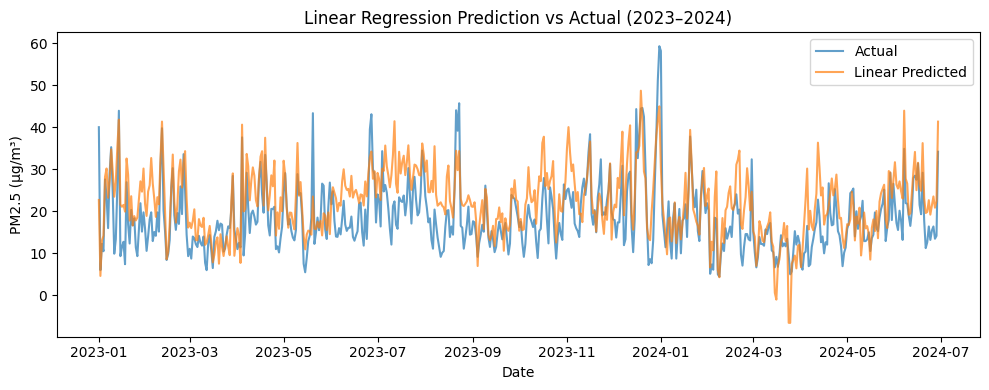

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(test_df['date local'], y_test.values, label='Actual', alpha=0.7)
plt.plot(test_df['date local'], y_pred_lr, label='Linear Predicted', alpha=0.7)
plt.title('Linear Regression Prediction vs Actual (2023–2024)')
plt.xlabel('Date')
plt.ylabel('PM2.5 (μg/m³)')
plt.legend()
plt.tight_layout()
plt.show()


###Ridge & Lasso Regression

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print(f"🔸 Ridge - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}, MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}, R²: {r2_score(y_test, y_pred_ridge):.2f}")
print(f"🔸 Lasso - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}, MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}, R²: {r2_score(y_test, y_pred_lasso):.2f}")


🔸 Ridge - RMSE: 6.86, MAE: 5.59, R²: 0.26
🔸 Lasso - RMSE: 6.85, MAE: 5.59, R²: 0.27


###Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf=mean_absolute_error(y_test, y_pred_rf)
print(f"🌲 Random Forest - RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")


🌲 Random Forest - RMSE: 6.59, MAE: 5.04, R²: 0.32


### XGBoost

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb=mean_absolute_error(y_test, y_pred_xgb)
print(f"🚀 XGBoost - RMSE: {rmse_xgb:.2f}, MAE: {mae_xgb:.2f}, R²: {r2_xgb:.2f}")


🚀 XGBoost - RMSE: 6.54, MAE: 5.05, R²: 0.33


###Feature Importance

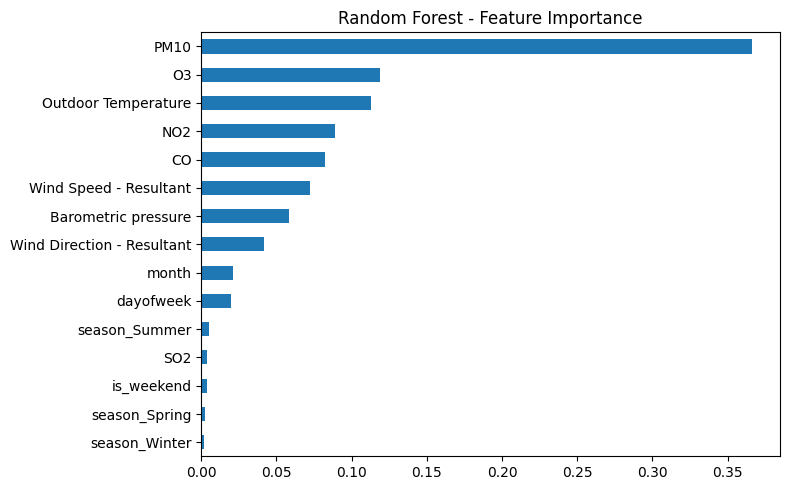

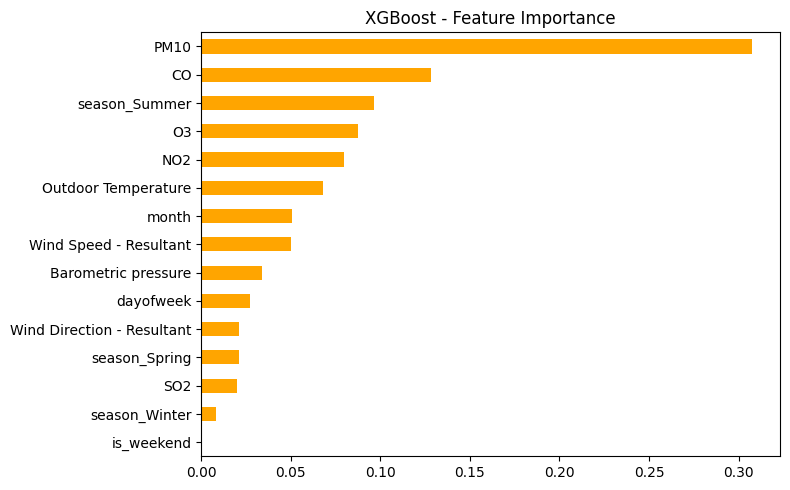

In [ ]:
# Random Forest Importance
rf_importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values()

plt.figure(figsize=(8, 5))
rf_importances.plot(kind='barh')
plt.title('Random Forest - Feature Importance')
plt.tight_layout()
plt.show()

# XGBoost Importance
xgb_importances = pd.Series(xgb.feature_importances_, index=feature_cols).sort_values()

plt.figure(figsize=(8, 5))
xgb_importances.plot(kind='barh', color='orange')
plt.title('XGBoost - Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
(rf_importances.sort_values( ascending = False )*100).cumsum()

,0
PM10,36.654248
O3,48.550924
Outdoor Temperature,59.867723
NO2,68.747125
CO,76.965960
Wind Speed - Resultant,84.220872
Barometric pressure,90.034971
Wind Direction - Resultant,94.237020
month,96.364319
dayofweek,98.357512


###Cross-Validation + Hyperparameter Tuning-Random Forest and XG Boost

In [ ]:
# Time-based split
tscv = TimeSeriesSplit(n_splits=5)

# Random Forest Grid Search
rf_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_grid,
                       cv=tscv, scoring='neg_root_mean_squared_error')
grid_rf.fit(X_train_scaled, y_train)

print("✅ Best RF Params:", grid_rf.best_params_)
print("🔹 CV RMSE:", -grid_rf.best_score_)

# XGBoost Grid Search
xgb_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1]
}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42), xgb_grid,
                        cv=tscv, scoring='neg_root_mean_squared_error')
grid_xgb.fit(X_train_scaled, y_train)

print("✅ Best XGB Params:", grid_xgb.best_params_)
print("🔹 CV RMSE:", -grid_xgb.best_score_)


✅ Best RF Params: {'max_depth': 5, 'n_estimators': 50}
🔹 CV RMSE: 8.144066481167894
✅ Best XGB Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
🔹 CV RMSE: 7.919717874172332


####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Use best parameters from GridSearch
best_params_rf = {
    'n_estimators': 50,
    'max_depth': 5
}

# Retrain model
rf_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_best.fit(X_train_scaled, y_train)

# Predict
y_pred_rf_best = rf_best.predict(X_test_scaled)

# Evaluate
rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_rf_best))
r2_rf_best = r2_score(y_test, y_pred_rf_best)
mae_rf_best = mean_absolute_error(y_test,y_pred_rf_best)
print(f"🌲 Final Random Forest - RMSE: {rmse_rf_best:.2f}, MAE: {mae_rf_best:.2f}, R²: {r2_rf_best:.2f}")


🌲 Final Random Forest - RMSE: 6.43, MAE: 5.13, R²: 0.35


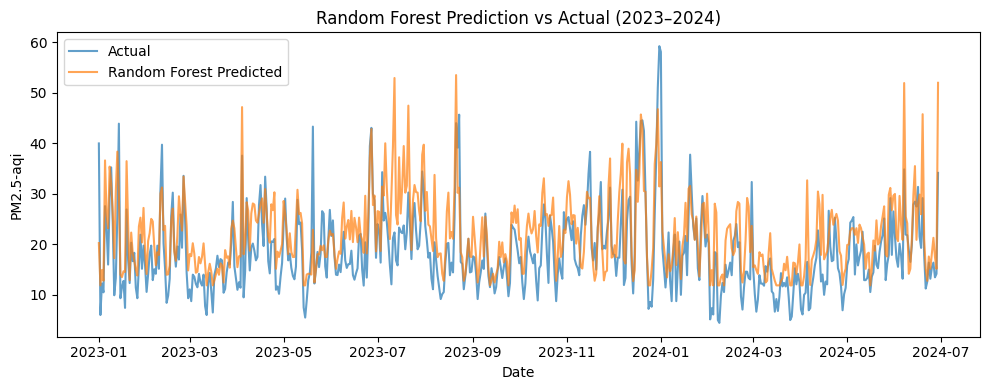

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(test_df['date local'], y_test.values, label='Actual', alpha=0.7)
plt.plot(test_df['date local'], y_pred_rf_best, label='Random Forest Predicted', alpha=0.7)
plt.title('Random Forest Prediction vs Actual (2023–2024)')
plt.xlabel('Date')
plt.ylabel('PM2.5-aqi')
plt.legend()
plt.tight_layout()
plt.show()

####XG Boost

In [ ]:
from xgboost import XGBRegressor

# Use best parameters from GridSearch
best_params_xgb = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.05
}

# Retrain model
xgb_best = XGBRegressor(**best_params_xgb, random_state=42)
xgb_best.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb_best = xgb_best.predict(X_test_scaled)

# Evaluate
rmse_xgb_best = np.sqrt(mean_squared_error(y_test, y_pred_xgb_best))
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)
mae_xgb_best = mean_absolute_error(y_test,y_pred_xgb_best)
print(f"🚀 Final XGBoost - RMSE: {rmse_xgb_best:.2f}, MAE: {mae_xgb_best:.2f}, R²: {r2_xgb_best:.2f}")


🚀 Final XGBoost - RMSE: 6.72, MAE: 5.38, R²: 0.29


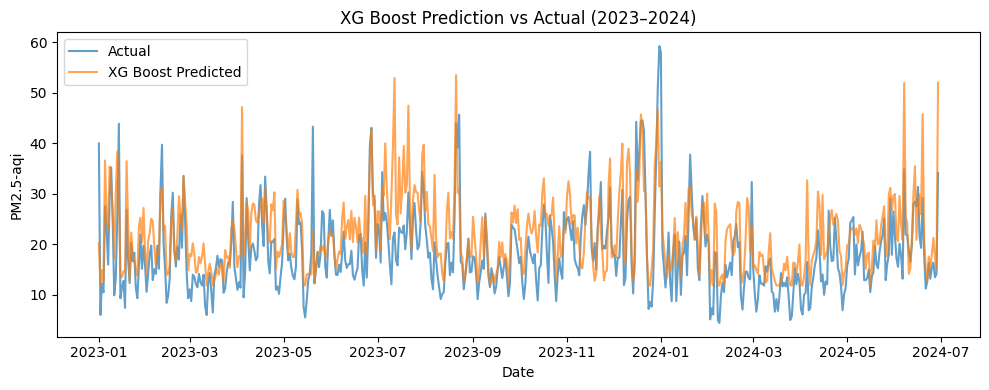

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(test_df['date local'], y_test.values, label='Actual', alpha=0.7)
plt.plot(test_df['date local'], y_pred_rf_best, label='XG Boost Predicted', alpha=0.7)
plt.title('XG Boost Prediction vs Actual (2023–2024)')
plt.xlabel('Date')
plt.ylabel('PM2.5-aqi')
plt.legend()
plt.tight_layout()
plt.show()

###Random Forest based on top features

In [ ]:
top_features =rf_importances.sort_values( ascending = False ).abs().sort_values(ascending=False).head(9).index

In [ ]:
top_features

Index(['PM10', 'O3', 'Outdoor Temperature', 'NO2', 'CO',
       'Wind Speed - Resultant', 'Barometric pressure',
       'Wind Direction - Resultant', 'month'],
      dtype='object')

In [ ]:
# Rebuild dataset with top N features only
X_top = df_aqicleaned[top_features]
y_top = df_aqicleaned['PM2.5']

# Chronological split
train_df = df_aqicleaned[df_aqicleaned['year'] <= 2022]
test_df = df_aqicleaned[df_aqicleaned['year'] >= 2023]

X_train_top = train_df[top_features]
y_train_top = train_df[target]
X_test_top = test_df[top_features]
y_test_top = test_df[target]

# Scale features
scaler = StandardScaler()
X_train_top = scaler.fit_transform(X_train_top)
X_test_top = scaler.transform(X_test_top)

# Use best parameters from GridSearch
best_params_rf = {
    'n_estimators': 50,
    'max_depth': 5
}

# Train a new Random Forest with top features
rf_top = RandomForestRegressor(**best_params_rf, random_state=42)
rf_top.fit(X_train_top, y_train_top)

# Evaluate on test set
y_pred_top = rf_top.predict(X_test_top)
rmse_rf_top = np.sqrt(mean_squared_error(y_test_top, y_pred_top))
r2_rf_top = r2_score(y_test_top, y_pred_top)
mae_rf_top = mean_absolute_error(y_test_top,y_pred_top)
print(f"🌲 Final Random Forest - RMSE: {rmse_rf_top:.2f}, MAE: {mae_rf_top:.2f}, R²: {r2_rf_top:.2f}")

🌲 Final Random Forest - RMSE: 6.41, MAE: 5.12, R²: 0.36


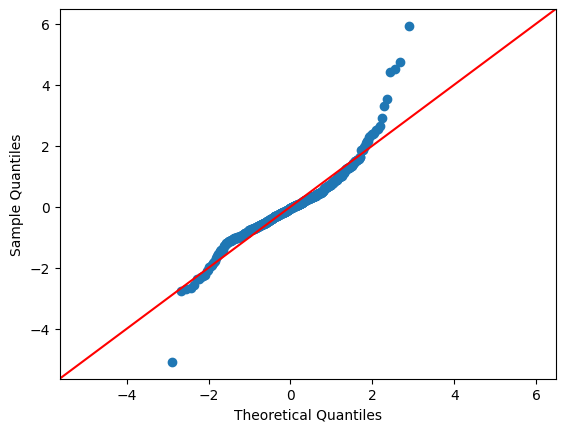

In [ ]:
# QQ Plot - Residuals are normally distributed
res = y_test_top - y_pred_top
sm.qqplot(res, fit=True, line="45") ;

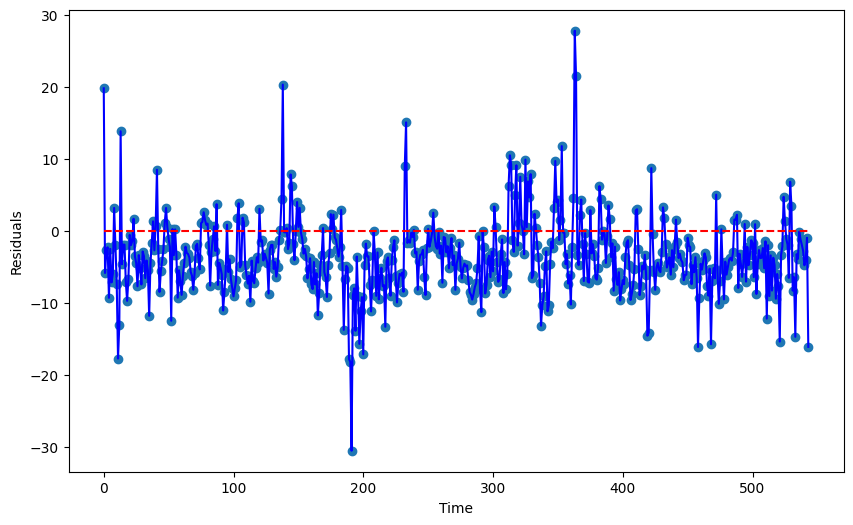

In [ ]:
# Residuals vs Time - indepedence
plt.figure(figsize = (10,6))
plt.scatter(range(len(res)), res)
plt.plot(range(len(res)), res, 'b')
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed') ;

###XG Boost based on top features

In [ ]:
(xgb_importances.sort_values( ascending = False )*100).cumsum()

,0
PM10,30.772575
CO,43.608986
season_Summer,53.281273
O3,62.027515
NO2,69.984161
Outdoor Temperature,76.794067
month,81.863182
Wind Speed - Resultant,86.879143
Barometric pressure,90.267723
dayofweek,92.996269


In [ ]:
topxg_features = xgb_importances.sort_values( ascending = False ).abs().sort_values(ascending=False).head(11).index

In [ ]:
topxg_features

Index(['PM10', 'CO', 'season_Summer', 'O3', 'NO2', 'Outdoor Temperature',
       'month', 'Wind Speed - Resultant', 'Barometric pressure', 'dayofweek',
       'Wind Direction - Resultant'],
      dtype='object')

In [ ]:
X_topxg = df_aqicleaned[topxg_features]
y_topxg = df_aqicleaned['PM2.5']

params = grid_xgb.best_params_

# Chronological split
train_df = df_aqicleaned[df_aqicleaned['year'] <= 2022]
test_df = df_aqicleaned[df_aqicleaned['year'] >= 2023]

X_train_topxg = train_df[topxg_features]
y_train_topxg = train_df[target]
X_test_topxg = test_df[topxg_features]
y_test_topxg = test_df[target]

# Scale features
scaler = StandardScaler()
X_train_topxg = scaler.fit_transform(X_train_topxg)
X_test_topxg = scaler.transform(X_test_topxg)

xgb_top = XGBRegressor(**best_params_xgb, random_state=42)
xgb_top.fit(X_train_topxg,y_train_topxg)
y_pred_xgb = xgb_top.predict(X_test_topxg)

# Evaluate on test set
y_pred_topxg = xgb_top.predict(X_test_topxg)
rmse_topxg = np.sqrt(mean_squared_error(y_test_topxg, y_pred_topxg))
r2_topxg = r2_score(y_test_topxg, y_pred_topxg)
mae_topxg = mean_absolute_error(y_test_topxg,y_pred_topxg)
print(f"🌟 Final XGBoost - RMSE: {rmse_topxg:.2f}, MAE: {mae_topxg:.2f}, R²: {r2_topxg:.2f}")

🌟 Final XGBoost - RMSE: 6.71, MAE: 5.38, R²: 0.30


###Full TensorFlow Regression

In [ ]:
pip install tensorflow

In [ ]:
# Build a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Predict
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 621.9760 - mae: 20.4305 - val_loss: 116.2901 - val_mae: 7.0960
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 101.3242 - mae: 6.9423 - val_loss: 82.6605 - val_mae: 5.8887
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 95.1131 - mae: 6.6244 - val_loss: 72.8026 - val_mae: 5.5485
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 75.1319 - mae: 6.2970 - val_loss: 72.2613 - val_mae: 5.5436
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 78.3571 - mae: 6.2823 - val_loss: 62.2610 - val_mae: 5.2899
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 78.2993 - mae: 6.1373 - val_loss: 63.7781 - val_mae: 5.2390
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 81.3747 - mae: 6.1162 - val_loss: 61.5010 - val_mae: 5.1994
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 71.2307 - mae: 6.1373 - val_loss: 61.3758 - val_mae: 5.1743
Epoch 9/50
109/109 ━━━━━━━━━━

# Data Visualization/Communication of Results

This project demonstrates the successful application of machine learning models to forecast air pollutant concentrations, specifically PM2.5 using historical air quality and meteorological data


*   Random Forest Outperformed: Among the models tested, Random Forest showed superior performance in terms of RMSE and MAE, highlighting its robustness for time-series regression tasks involving tabular data.
*   Public Health Applications: The forecasting system developed can serve as an early warning tool to inform the public and guide environmental policy actions, especially in pollution-sensitive regions like New Mexico.

Overall, this project establishes a solid foundation for future work involving more pollutants, longer forecasting windows, and advanced deep learning models like LSTMs. With further enhancements and real-time deployment, such systems can make a tangible impact on public health and environmental planning.

